In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.exposure
from skimage import transform

In [22]:
# Definicja funkcji do wyświetlania obrazu i histogramu
def plotimhist(image, clip_range=None):
    plt.figure(figsize=(12,6))
    ax1 = plt.subplot(1,2,1)
    ax1.imshow(image, vmin=1, vmax=254)
    ax2 = plt.subplot(1,2,2)
    if clip_range is not None:
        image_clipped = np.clip(image, clip_range[0], clip_range[1])
        ax2.hist(image_clipped.flatten(), bins=254, range=(1, 254), color='gray', alpha=0.5)
    else:
        ax2.hist(image.flatten(), bins=254, range=(1, 254), color='gray', alpha=0.5)
    plt.show()

In [23]:
# Load images
im_hr = skimage.io.imread('./lab_03/Satellite_HR_10m_1_22.png')
im_lr = skimage.io.imread('./lab_03/Satellite_LR_10m_1_22.png')

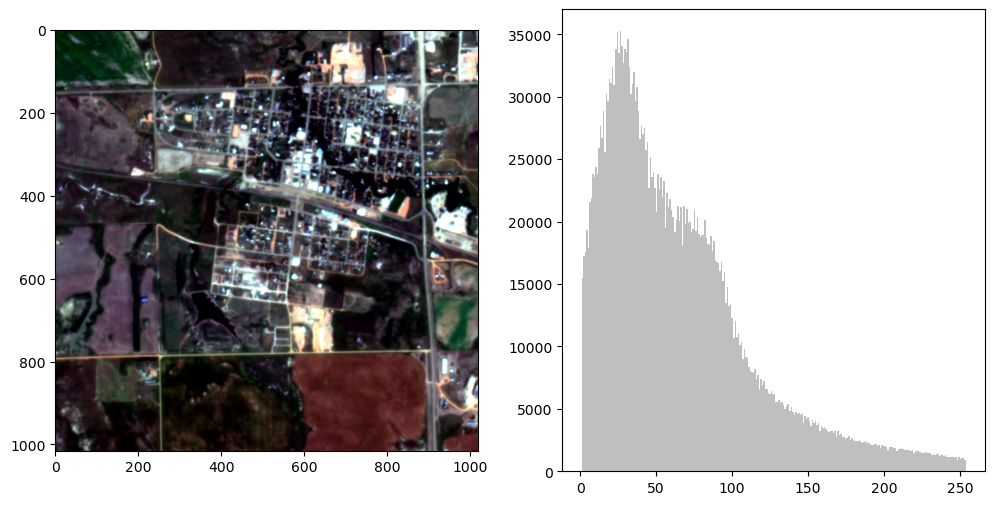

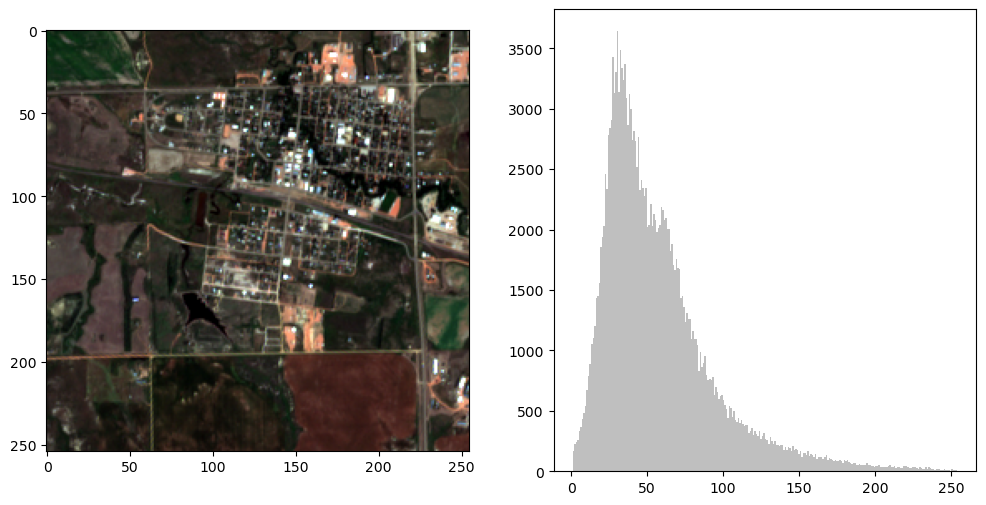

In [24]:
# Wyświetlenie obrazów i ich histogramów
plotimhist(im_hr)
plotimhist(im_lr)

In [25]:
# Sprawdzenie podstawowych właściwości obrazów
print("Właściwości obrazu o wysokiej rozdzielczości:")
print("Kształt:", im_hr.shape)
print("Typ danych:", im_hr.dtype)
print("Wartość minimalna:", np.min(im_hr))
print("Wartość maksymalna:", np.max(im_hr))

print("\nWłaściwości obrazu o niskiej rozdzielczości:")
print("Kształt:", im_lr.shape)
print("Typ danych:", im_lr.dtype)
print("Wartość minimalna:", np.min(im_lr))
print("Wartość maksymalna:", np.max(im_lr))

Właściwości obrazu o wysokiej rozdzielczości:
Kształt: (1016, 1020, 4)
Typ danych: uint8
Wartość minimalna: 0
Wartość maksymalna: 255

Właściwości obrazu o niskiej rozdzielczości:
Kształt: (254, 255, 4)
Typ danych: uint8
Wartość minimalna: 0
Wartość maksymalna: 255


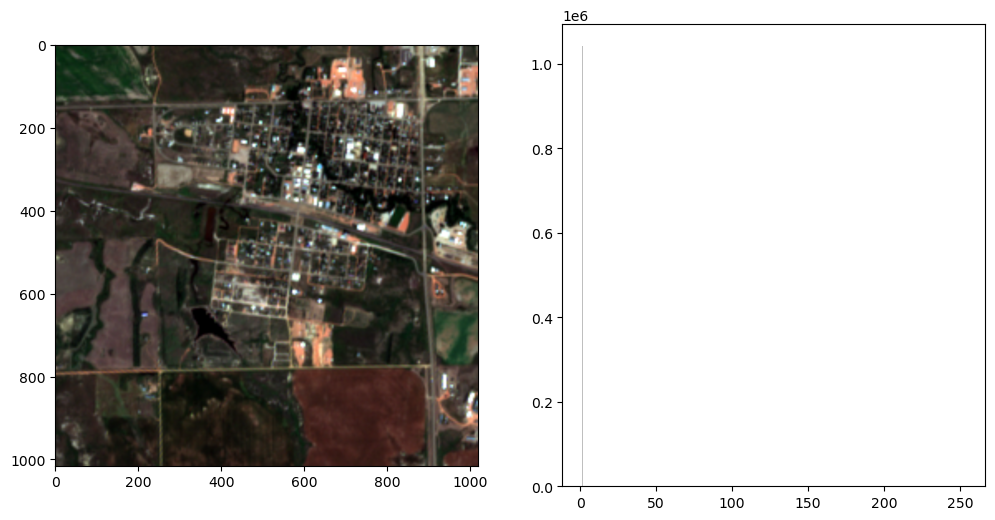

In [26]:
# Przeskalowywanie obrazu mniejszego do rozmiaru obrazu większego
im_lr_resampled = transform.resize(im_lr, im_hr.shape[:2], anti_aliasing=True)

# Wyświetlenie przeskalowanego obrazu i jego histogramu
plotimhist(im_lr_resampled)

In [35]:

# Print properties of resampled images
print("Resampled Low-Resolution Image:")
print("Shape:", im_lr_resampled.shape)
print("Data Type:", im_lr_resampled.dtype)
print("Min Value:", np.min(im_lr_resampled))
print("Max Value:", np.max(im_lr_resampled))

print("\nHigh-Resolution Image:")
print("Shape:", im_hr.shape)
print("Data Type:", im_hr.dtype)
print("Min Value:", np.min(im_hr))
print("Max Value:", np.max(im_hr))

Resampled Low-Resolution Image:
Shape: (1016, 1020, 4)
Data Type: float64
Min Value: 0.0
Max Value: 1.0

High-Resolution Image:
Shape: (1016, 1020, 4)
Data Type: uint8
Min Value: 0
Max Value: 255


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


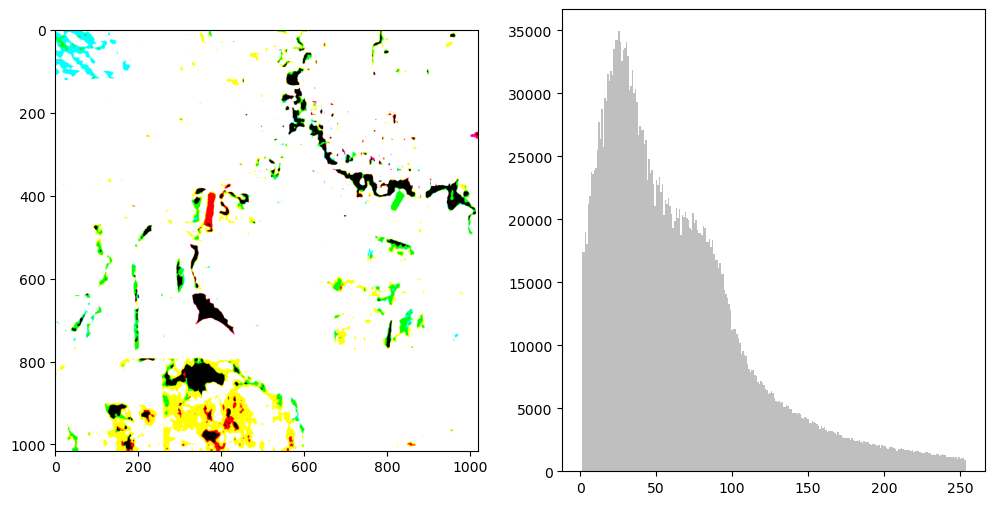

In [36]:
# Dopasowywanie histogramów
im_lr_matched = skimage.exposure.match_histograms(im_lr_resampled, im_hr)

# Wyświetlenie dopasowanego obrazu i jego histogramu
plotimhist(im_lr_matched)

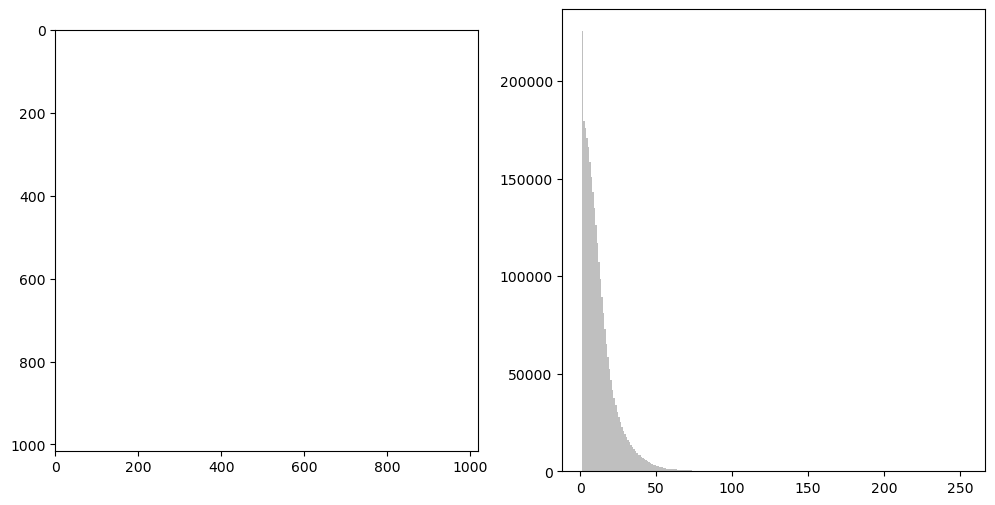

Średnia różnica: 8.354260508337193


In [39]:
# Odejmowanie jednego obrazu od drugiego
im_diff = np.abs(im_hr_cropped.astype(int) - im_lr_matched_cropped.astype(int))

# Wyświetlenie wyników odejmowania i obliczenie średniej różnicy
plotimhist(im_diff)
print("Średnia różnica:", np.mean(im_diff))